In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from pylab import rcParams
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure


rcParams['figure.figsize'] = 10, 6
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
df = pd.read_csv("data/model_training_data.csv").drop(["Unnamed: 0"], axis=1)
df.head()

,animeID,title_english,episodes,score,scored_by,rank,popularity,members,favorites,genre_Action,...,synopsis_embedded_296,synopsis_embedded_297,synopsis_embedded_298,synopsis_embedded_299,synopsis_embedded_300,premiered_Spring,premiered_Summer,premiered_Fall,premiered_Winter,premiered_Year
0,1,Cowboy Bebop,26.0,8.81,405664,26,39,795733,43460,1,...,-0.015616,0.003619,-0.010637,0.043498,-0.007210,1.0,0.0,0.0,0.0,1998
1,5,Cowboy Bebop: The Movie,1.0,8.41,120243,164,449,197791,776,1,...,0.013802,0.005209,-0.006860,0.036505,-0.017165,0.0,0.0,0.0,0.0,0
2,6,Trigun,26.0,8.30,212537,255,146,408548,10432,1,...,-0.004276,0.010292,-0.036921,0.017824,0.005914,1.0,0.0,0.0,0.0,1998
3,7,Witch Hunter Robin,26.0,7.33,32837,2371,1171,79397,537,1,...,-0.008391,0.026849,-0.003479,0.048176,-0.002020,0.0,1.0,0.0,0.0,2002
4,8,Beet the Vandel Buster,52.0,7.03,4894,3544,3704,11708,14,0,...,-0.009359,-0.016920,-0.021534,0.047166,-0.012552,0.0,0.0,1.0,0.0,2004


In [3]:
len(df)

2855

In [4]:
len(df.columns.tolist())

414

# PCA, plot in 2D

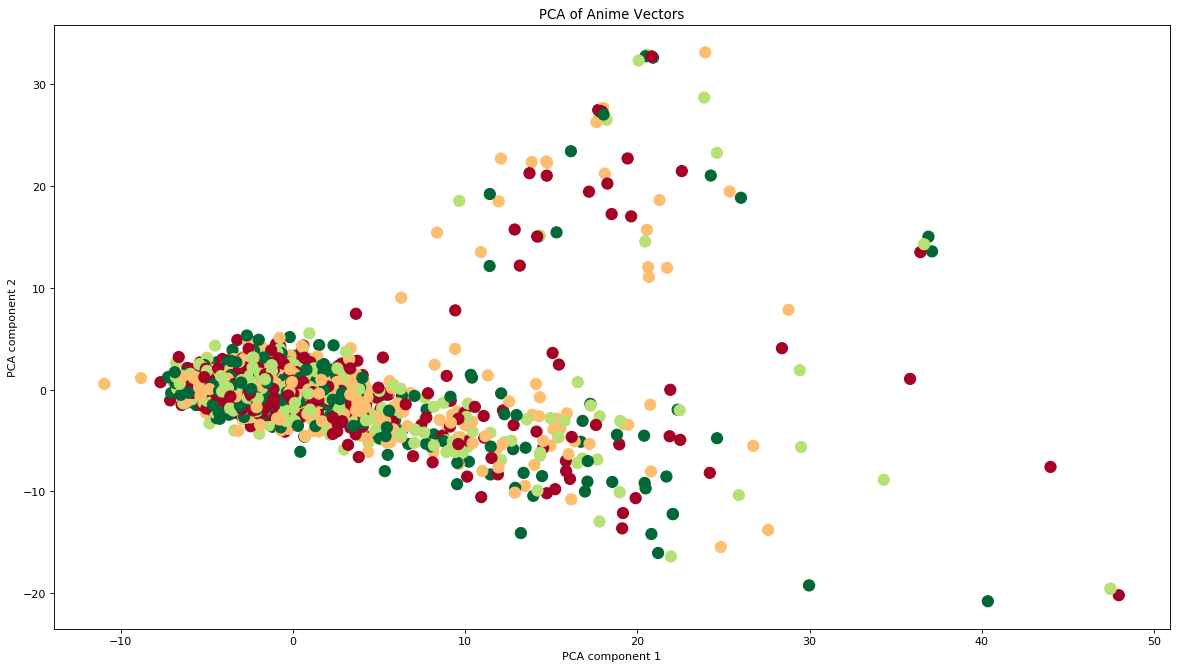

In [5]:
# make plot bigger
figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')

# normalize all the data
feature_cols = df.columns.tolist()
feature_cols.remove("animeID") # remove label
feature_cols.remove("title_english")

features = df[feature_cols]

scaled_features = StandardScaler().fit_transform(features)

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features)
principal_df = pd.DataFrame(data=principalComponents, columns = ['principal component 1', 'principal component 2'])


final_df = pd.concat([principal_df, df[['title_english']]], axis=1)


norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn
c = np.random.randint(1,5,size=len(df))

final_arr = np.array(final_df)
plt.scatter(final_arr[:, 0], final_arr[:, 1], c=c, s=100, cmap=cmap, norm=norm)
plt.title("PCA of Anime Vectors")
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')

plt.show()

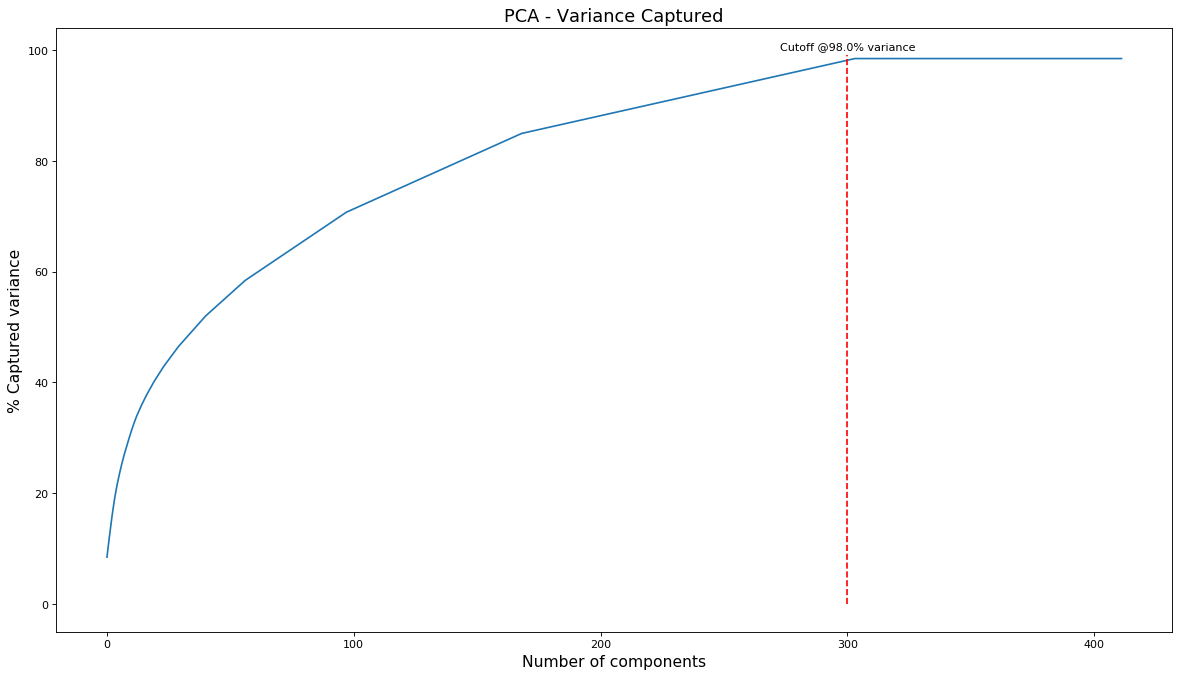

In [28]:
# Choose num PCA dims #
figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
n_components = 412

pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(scaled_features)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

plt.plot(range(n_components), var, )
plt.annotate("Cutoff @{}% variance".format(round(var[299], 2)), # this is the text
                 (300, var[299]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.plot([300] * 100, range(100), 'r--')
plt.xlabel("Number of components", size=14)
plt.ylabel("% Captured variance", size=14)
plt.title("PCA - Variance Captured", size=16)
plt.show()

In [37]:
var

array([ 8.5, 12.2, 15.7, 18.8, 21.3, 23.4, 25.3, 27. , 28.5, 30. , 31.4,
       32.7, 33.9, 34.9, 35.9, 36.8, 37.7, 38.5, 39.3, 40.1, 40.8, 41.5,
       42.2, 42.9, 43.5, 44.1, 44.7, 45.3, 45.9, 46.5, 47. , 47.5, 48. ,
       48.5, 49. , 49.5, 50. , 50.5, 51. , 51.5, 52. , 52.4, 52.8, 53.2,
       53.6, 54. , 54.4, 54.8, 55.2, 55.6, 56. , 56.4, 56.8, 57.2, 57.6,
       58. , 58.4, 58.7, 59. , 59.3, 59.6, 59.9, 60.2, 60.5, 60.8, 61.1,
       61.4, 61.7, 62. , 62.3, 62.6, 62.9, 63.2, 63.5, 63.8, 64.1, 64.4,
       64.7, 65. , 65.3, 65.6, 65.9, 66.2, 66.5, 66.8, 67.1, 67.4, 67.7,
       68. , 68.3, 68.6, 68.9, 69.2, 69.5, 69.8, 70.1, 70.4, 70.7, 70.9,
       71.1, 71.3, 71.5, 71.7, 71.9, 72.1, 72.3, 72.5, 72.7, 72.9, 73.1,
       73.3, 73.5, 73.7, 73.9, 74.1, 74.3, 74.5, 74.7, 74.9, 75.1, 75.3,
       75.5, 75.7, 75.9, 76.1, 76.3, 76.5, 76.7, 76.9, 77.1, 77.3, 77.5,
       77.7, 77.9, 78.1, 78.3, 78.5, 78.7, 78.9, 79.1, 79.3, 79.5, 79.7,
       79.9, 80.1, 80.3, 80.5, 80.7, 80.9, 81.1, 81

# Show the effects of averaging vectors

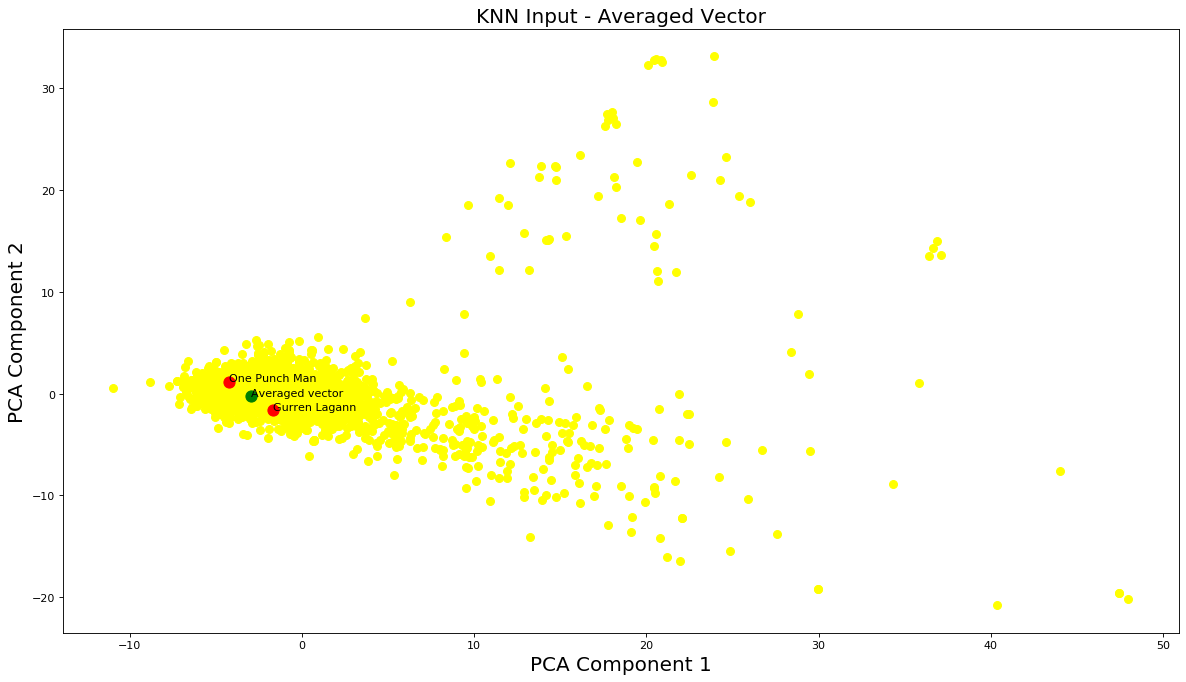

In [10]:
# make plot bigger
figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')

# normalize all the data
feature_cols = df.columns.tolist()
feature_cols.remove("animeID") # remove label
feature_cols.remove("title_english")

features = df[feature_cols]

scaled_features = StandardScaler().fit_transform(features)

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features)
principal_df = pd.DataFrame(data=principalComponents, columns = ['principal component 1', 'principal component 2'])


final_df = pd.concat([principal_df, df[['title_english']]], axis=1)


norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn
c = np.random.randint(1,5,size=len(df))

final_arr = np.array(final_df)
plt.scatter(final_arr[:, 0], final_arr[:, 1], color="yellow", s=50, cmap=cmap, norm=norm)

# plot "liked" anime
liked_anime = {"Gurren Lagann": 761, "One Punch Man": 2234}
liked_anime_vectors = []
for anime in liked_anime.keys():    
    plt.scatter(final_arr[liked_anime[anime], 0], final_arr[liked_anime[anime], 1], s=100, color="red", norm=norm)
    plt.annotate(anime, (final_arr[liked_anime[anime], 0], final_arr[liked_anime[anime], 1]))
    liked_anime_vectors.append(final_arr[liked_anime[anime]])

# plot avg vector
avg_vector = np.average(np.array(liked_anime_vectors)[:, 0:2], axis=0)
plt.scatter(avg_vector[0], avg_vector[1], s=100, color="green", norm=norm)
plt.annotate("Averaged vector", (avg_vector[0], avg_vector[1]))

# titles
plt.title("KNN Input - Averaged Vector", fontsize=18)
plt.xlabel('PCA Component 1', fontsize=18)
plt.ylabel('PCA Component 2', fontsize=18)

plt.show()

# DBSCAN

# Tune DBSCAN

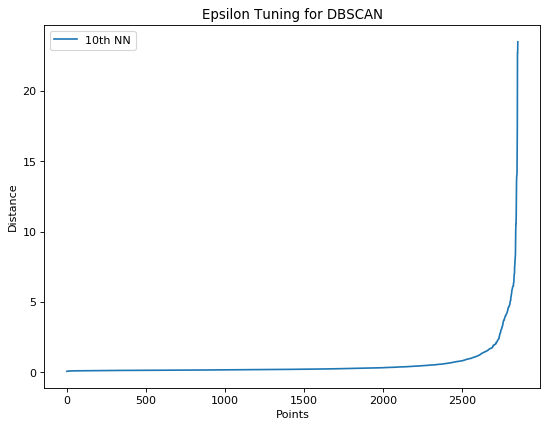

In [18]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


xy = final_arr[:, 0:2]
nbrs = NearestNeighbors(n_neighbors=10, algorithm='kd_tree').fit(xy)
distances, indices = nbrs.kneighbors(xy)
y = sorted(distances[:, -1])
x = range(0, len(y))
plt.plot(x, y, label="10th NN")
plt.title("Epsilon Tuning for DBSCAN")
plt.legend()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

Estimated number of clusters: 8
Estimated number of noise points: 18


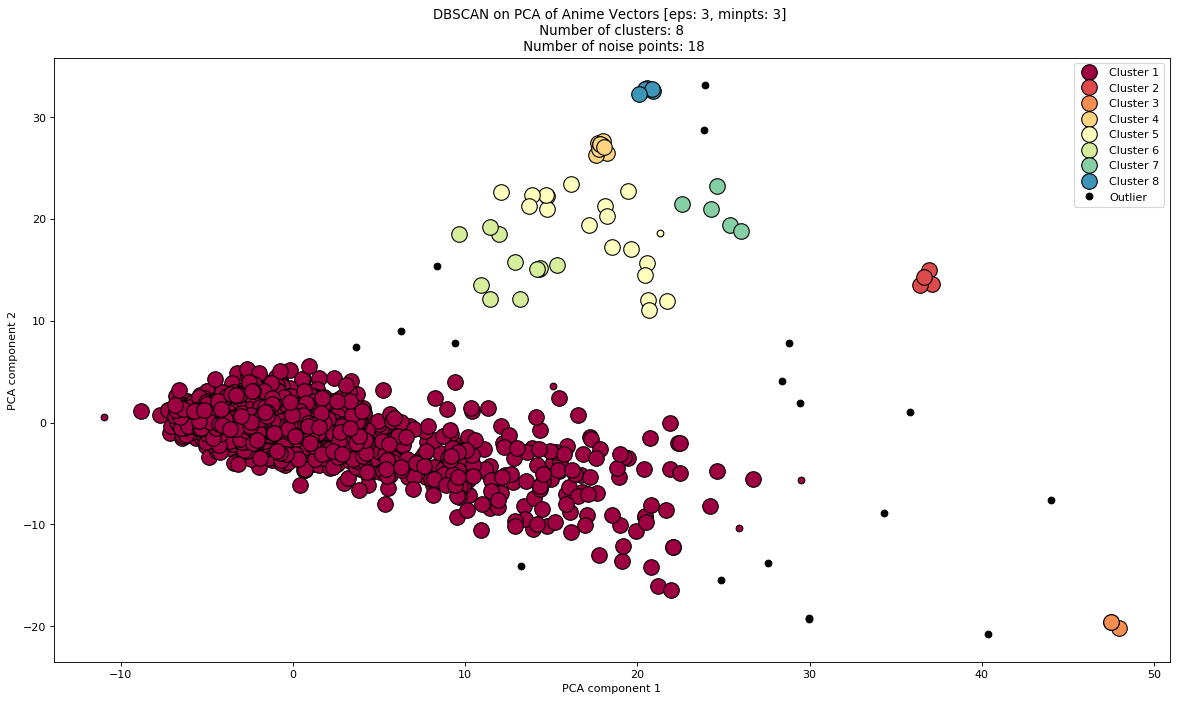

In [68]:
figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# Compute DBSCAN
EPS=3
MIN_SAMPLES=3
db = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES).fit(final_arr[:, 0:2])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    if k == -1:
        xy = final_arr[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = final_arr[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6, label="Outlier")
    else:
        xy = final_arr[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14, label="Cluster {}".format(k+1))

        xy = final_arr[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

plt.legend()
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('DBSCAN on PCA of Anime Vectors [eps: {}, minpts: {}] \n Number of clusters: {} \n Number of noise points: {}'.format(EPS, MIN_SAMPLES, n_clusters_, n_noise_))
plt.show()

In [79]:
# obtain top-k anime in each cluster
topk = 10
master_map = {}
master_list = []
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    cluster_df = None
    
    if k == -1:
        xy = final_arr[class_member_mask]
        all_anime_in_cluster = xy[:, 2]
        cluster_df = pd.DataFrame(data=all_anime_in_cluster, columns=["Anime"])
        master_map["-1"] = cluster_df
    else:
        xy = final_arr[class_member_mask]
        all_anime_in_cluster = xy[:, 2]
        cluster_df = pd.DataFrame(data=all_anime_in_cluster, columns=["Anime"])
        master_map[k+1] = cluster_df

# 1, 4, 5, 6, outlier

In [94]:
master_map[1].head(15)

,Anime
0,Cowboy Bebop
1,Cowboy Bebop: The Movie
2,Trigun
3,Witch Hunter Robin
4,Beet the Vandel Buster
5,Honey and Clover
6,Monster
7,Naruto
8,The Prince of Tennis
9,Desert Punk


# Feature Correlation Matrix

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def correlation_heatmap(df):
    
    correlations = df.corr()
    fig, ax = plt.subplots(figsize=(18,18))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show()

# get standardized df for correlation #
feature_titles = df.drop(['animeID', 'title_english'], axis=1).columns.tolist()
corr_df = pd.DataFrame(data=scaled_features, columns=feature_titles)
drop_cols = [x for x in df.columns.tolist() if "synopsis" in x]
corr_df_no_synopsis = corr_df.drop(drop_cols, axis=1)
corr_df_no_synopsis.head()

,episodes,score,scored_by,rank,popularity,members,favorites,genre_Action,genre_Adventure,genre_Comedy,...,type_Music,type_ONA,type_OVA,type_Special,type_TV,premiered_Spring,premiered_Summer,premiered_Fall,premiered_Winter,premiered_Year
0,0.166730,2.059094,3.666161,-1.252698,-1.028523,4.233284,6.739129,1.242805,1.764606,1.108480,...,-0.062192,-0.176233,-0.353414,-0.256313,0.726892,2.028913,-0.378645,-0.507105,-0.384068,0.716489
1,-0.389673,1.567628,0.712461,-1.202267,-0.885544,0.592367,-0.134356,1.242805,-0.566699,-0.902136,...,-0.062192,-0.176233,-0.353414,-0.256313,-1.375719,-0.492875,-0.378645,-0.507105,-0.384068,-1.374612
2,0.166730,1.432475,1.667572,-1.169011,-0.991209,1.875683,1.420568,1.242805,1.764606,1.108480,...,-0.062192,-0.176233,-0.353414,-0.256313,0.726892,2.028913,-0.378645,-0.507105,-0.384068,0.716489
3,0.166730,0.240672,-0.192066,-0.395730,-0.633761,-0.128544,-0.172842,1.242805,-0.566699,-0.902136,...,-0.062192,-0.176233,-0.353414,-0.256313,0.726892,-0.492875,2.640996,-0.507105,-0.384068,0.720676
4,0.745389,-0.127927,-0.481236,0.032937,0.249572,-0.540708,-0.257062,-0.804632,1.764606,-0.902136,...,-0.062192,-0.176233,-0.353414,-0.256313,0.726892,-0.492875,-0.378645,1.971978,-0.384068,0.722769


In [70]:
df.columns.tolist()

['animeID',
 'title_english',
 'episodes',
 'score',
 'scored_by',
 'rank',
 'popularity',
 'members',
 'favorites',
 'genre_Action',
 'genre_Adventure',
 'genre_Comedy',
 'genre_Dementia',
 'genre_Drama',
 'genre_Ecchi',
 'genre_Fantasy',
 'genre_Game',
 'genre_Harem',
 'genre_Historical',
 'genre_Horror',
 'genre_Kids',
 'genre_Magic',
 'genre_Military',
 'genre_Music',
 'genre_Mystery',
 'genre_Psychological',
 'genre_Romance',
 'genre_Sci-Fi',
 'genre_Slice of Life',
 'genre_Sports',
 'studio_"Brains Base"',
 'studio_A-1 Pictures',
 'studio_AIC',
 'studio_Arms',
 'studio_Bones',
 'studio_Diomedea',
 'studio_Doga Kobo',
 'studio_Gainax',
 'studio_Gonzo',
 'studio_J.C.Staff',
 'studio_Kyoto Animation',
 'studio_MAPPA',
 'studio_Madhouse',
 'studio_Manglobe',
 'studio_Nippon Animation',
 'studio_OLM',
 'studio_P.A. Works',
 'studio_Production I.G',
 'studio_Production Reed',
 'studio_Satelight',
 'studio_Shaft',
 'studio_Shin-Ei Animation',
 'studio_Silver Link.',
 'studio_Studio Deen

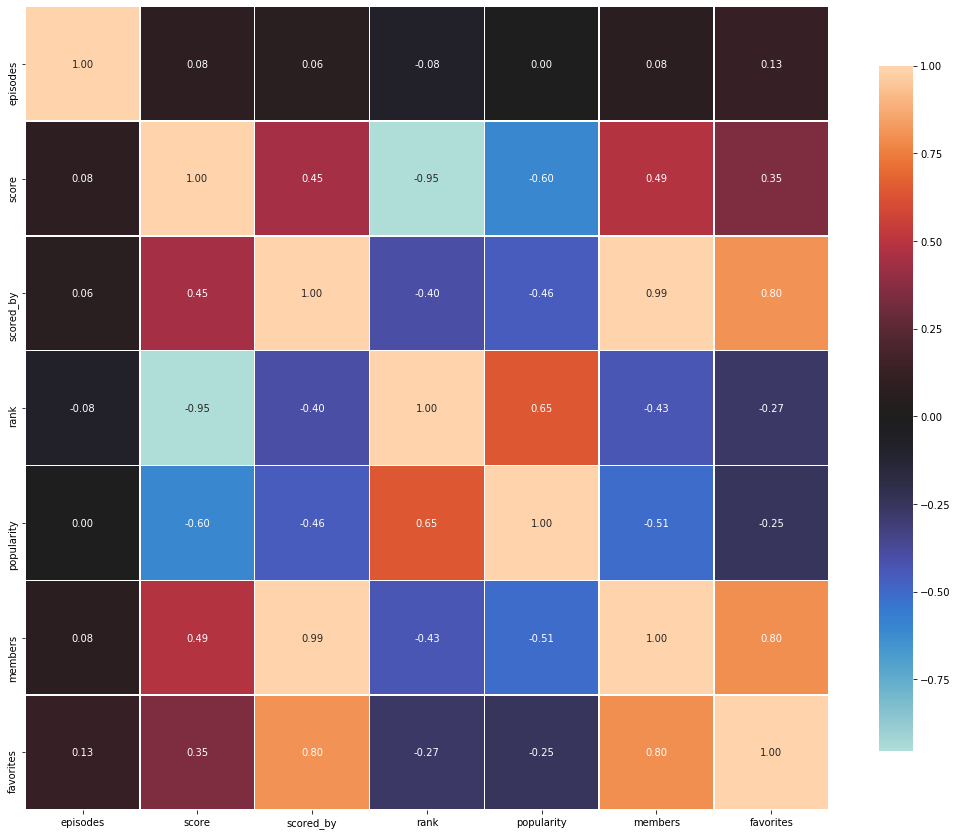

In [71]:
# stats #
anime_stat_titles = corr_df_no_synopsis.columns.tolist()[:7]
correlation_heatmap(corr_df_no_synopsis[anime_stat_titles])

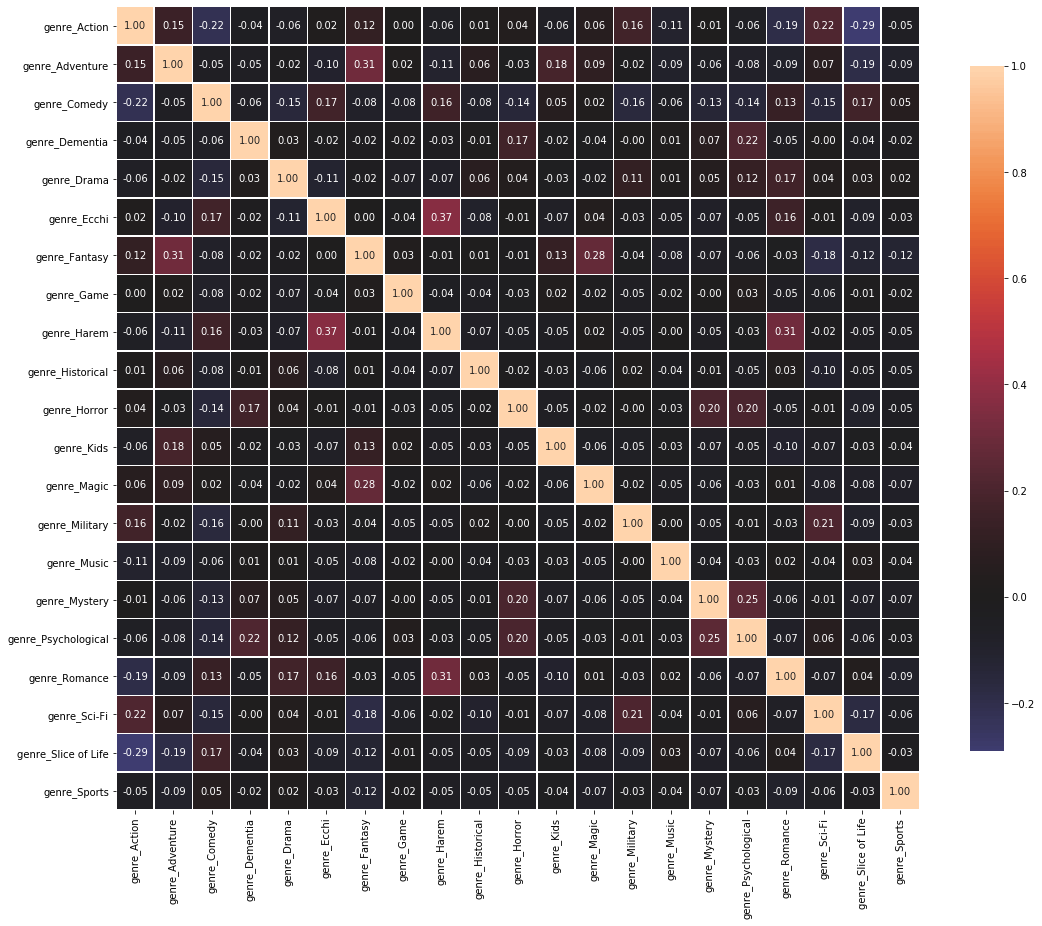

In [72]:
# genre #
anime_genre_titles = [x for x in corr_df_no_synopsis.columns.tolist() if "genre" in x]
correlation_heatmap(corr_df_no_synopsis[anime_genre_titles])

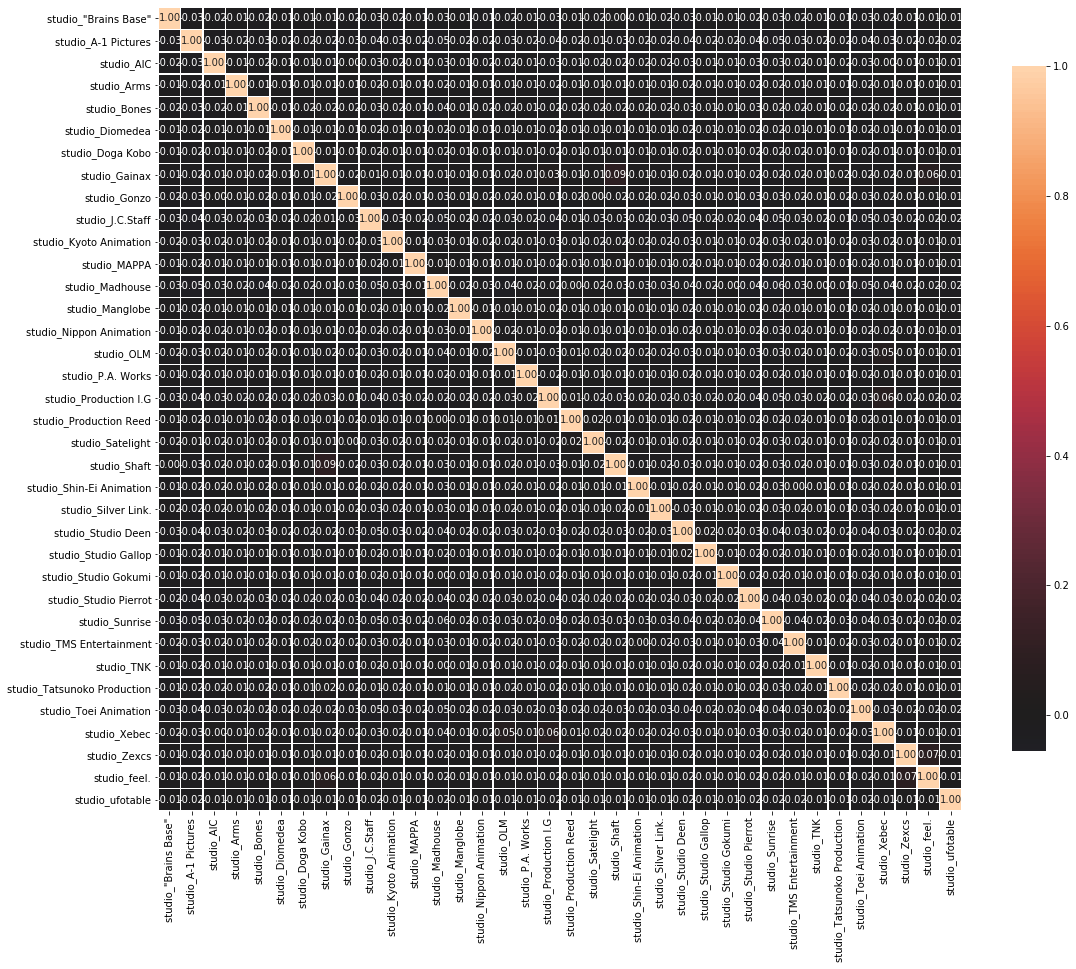

In [73]:
# studio #
anime_studio_titles = [x for x in corr_df_no_synopsis.columns.tolist() if "studio" in x]
correlation_heatmap(corr_df_no_synopsis[anime_studio_titles])

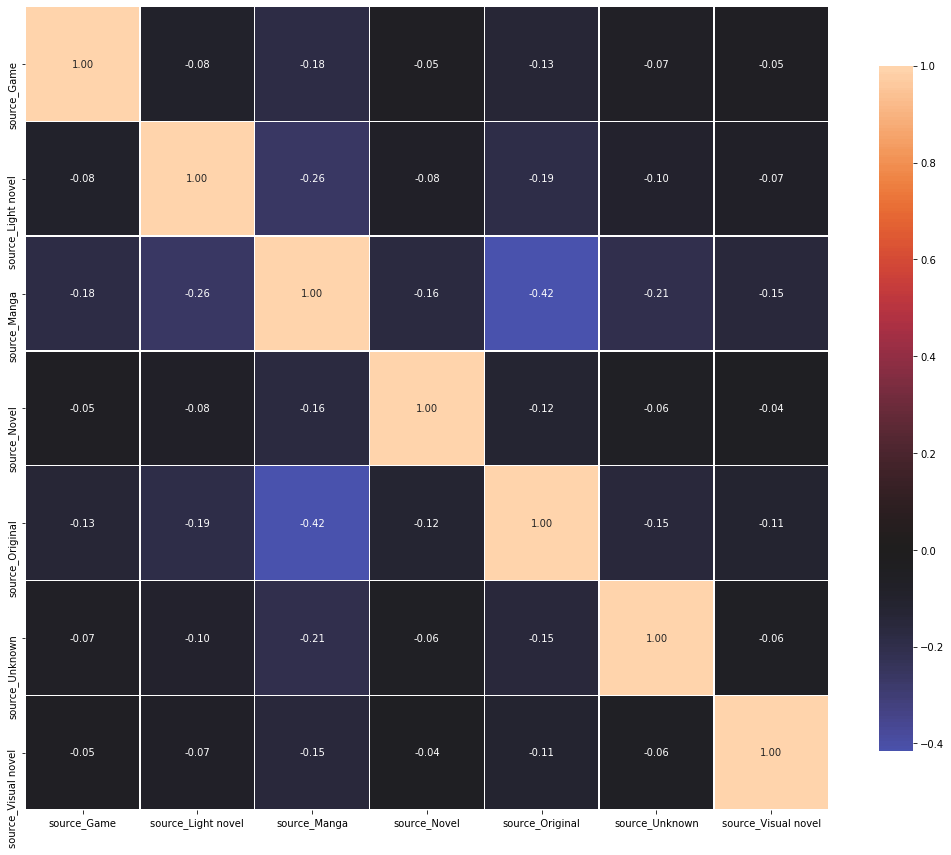

In [74]:
# source #
anime_source_titles = [x for x in corr_df_no_synopsis.columns.tolist() if "source" in x]
correlation_heatmap(corr_df_no_synopsis[anime_source_titles])

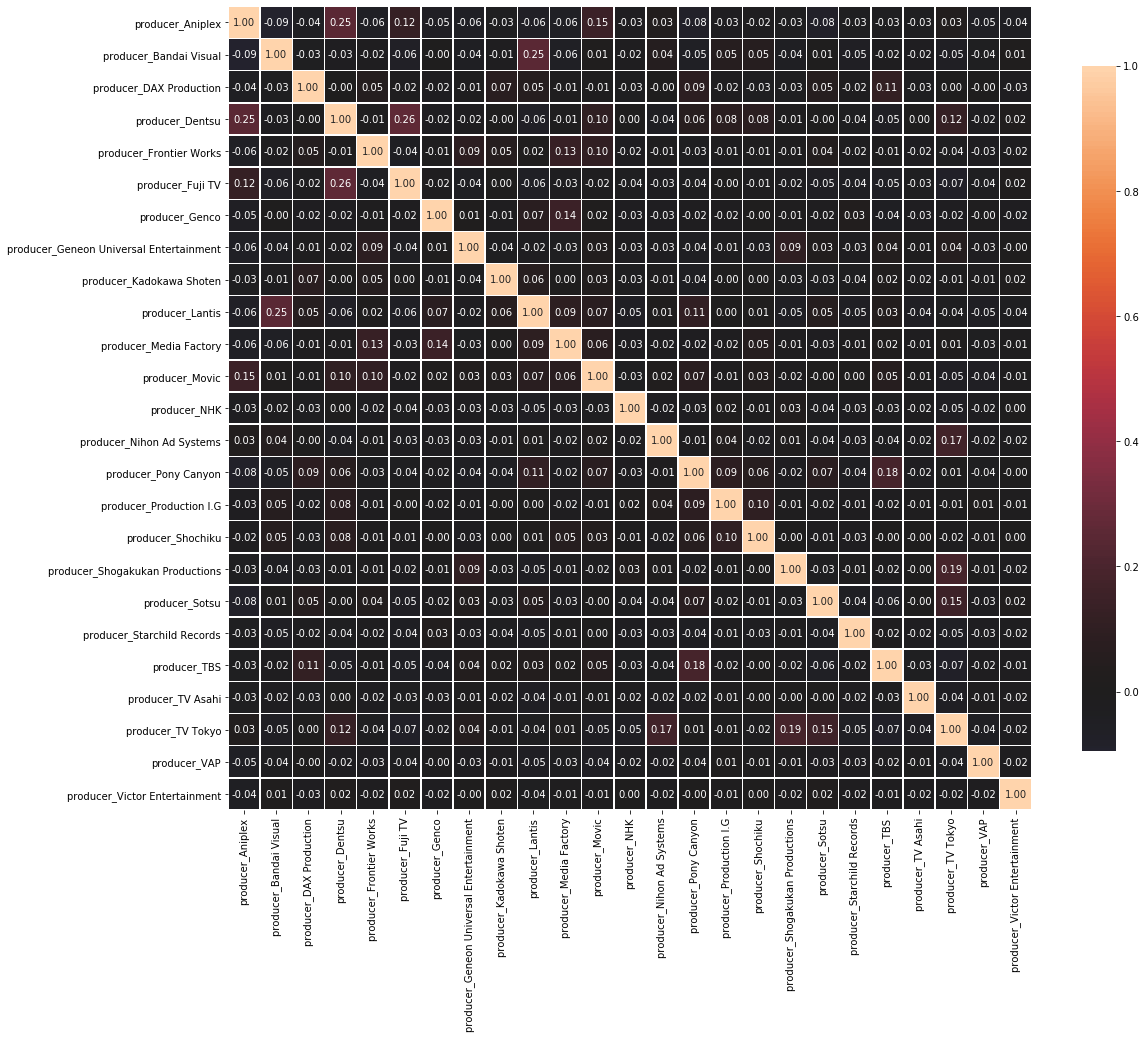

In [75]:
# producer #
anime_producer_titles = [x for x in corr_df_no_synopsis.columns.tolist() if "producer" in x]
correlation_heatmap(corr_df_no_synopsis[anime_producer_titles])

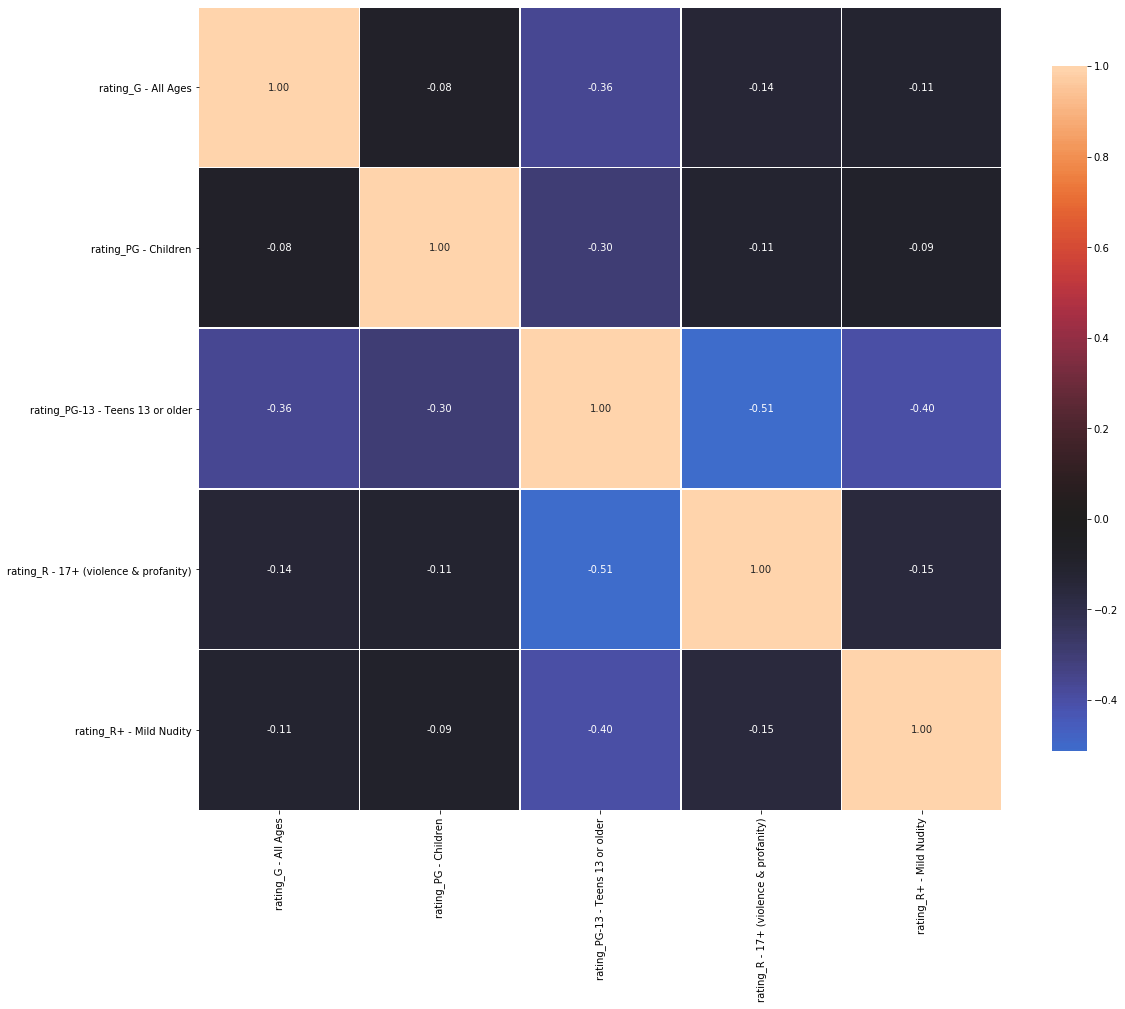

In [76]:
# rating #
anime_rating_titles = [x for x in corr_df_no_synopsis.columns.tolist() if "rating" in x]
correlation_heatmap(corr_df_no_synopsis[anime_rating_titles])

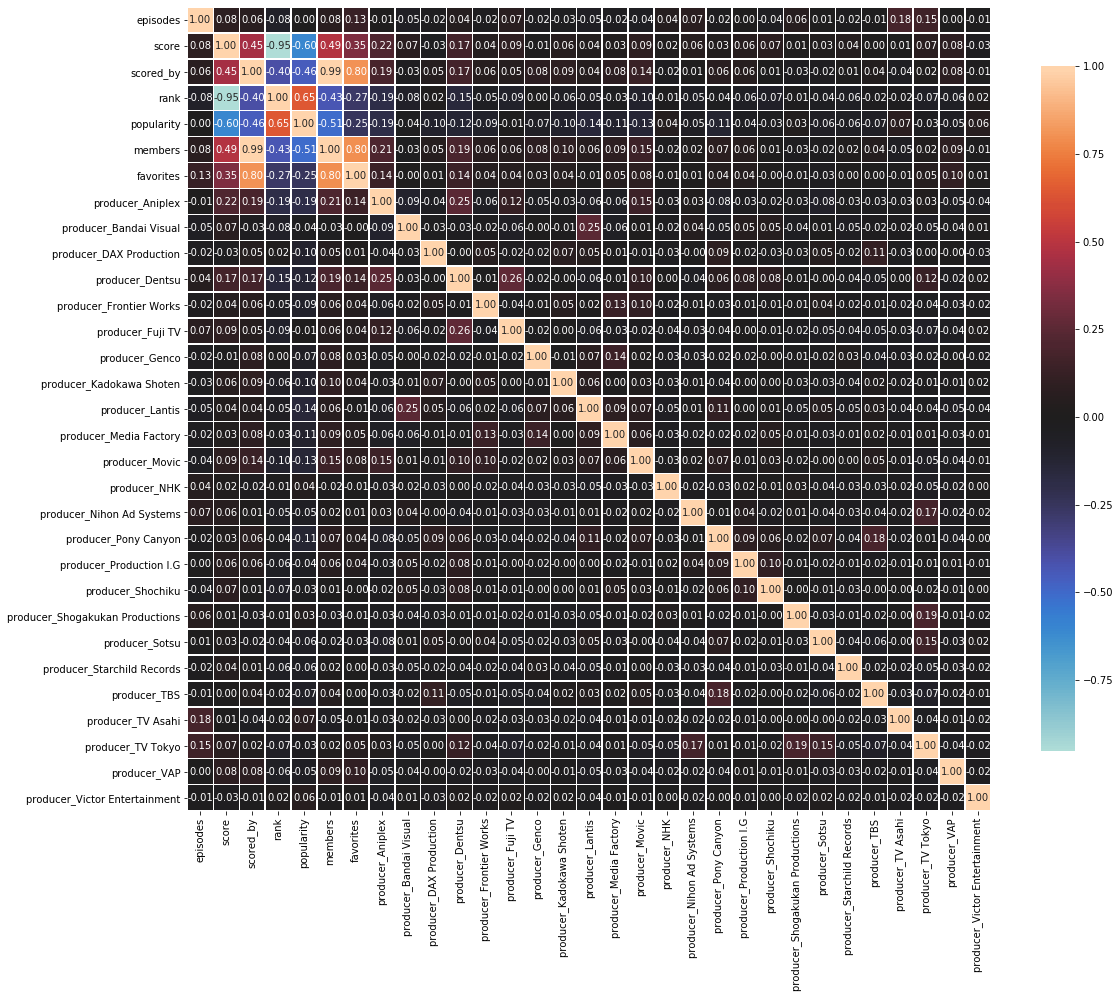

In [82]:
# stats vs producer #
anime_producer_temp = anime_producer_titles
anime_producer_temp.remove("producer_Geneon Universal Entertainment")
stats_producer_titles = anime_stat_titles + anime_producer_temp
correlation_heatmap(corr_df_no_synopsis[stats_producer_titles])

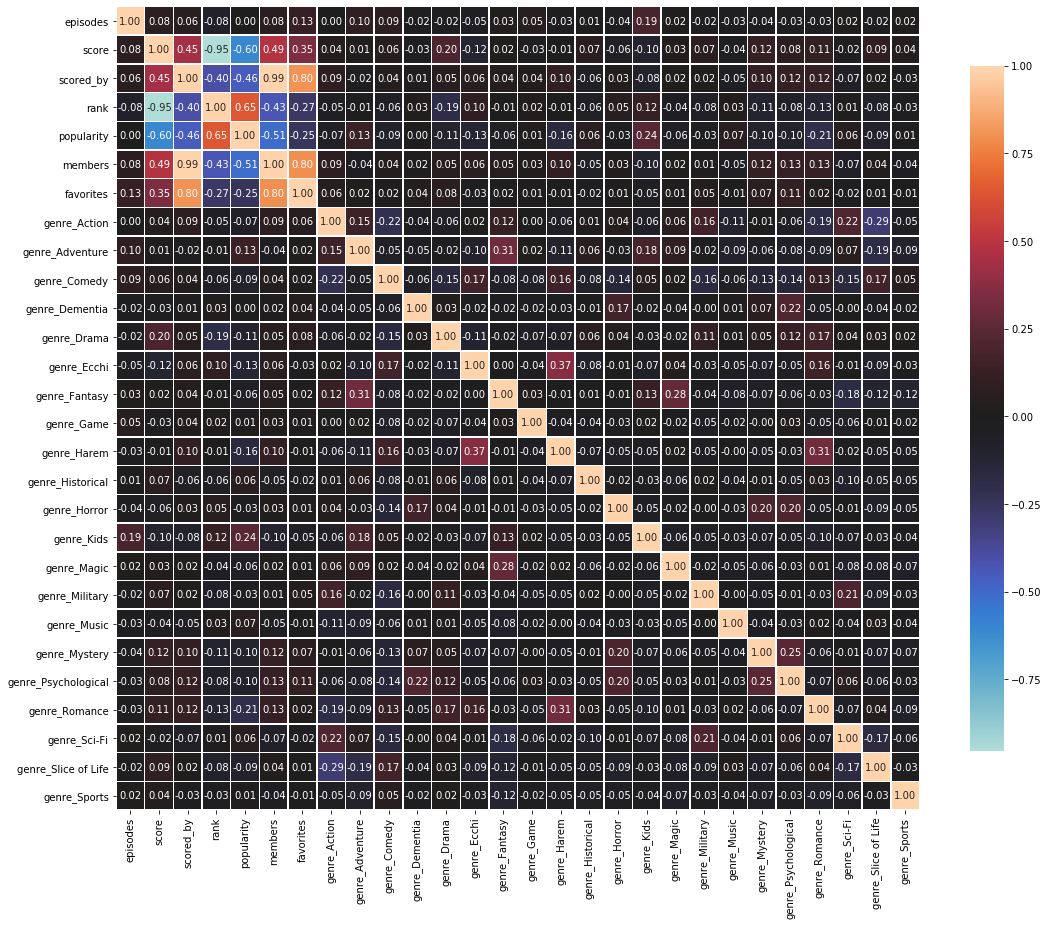

In [78]:
# stats vs genre #
stats_genre_titles = anime_stat_titles + anime_genre_titles
correlation_heatmap(corr_df_no_synopsis[stats_genre_titles])